In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
synergy = pd.read_csv('labels.csv')
smiles = pd.read_csv('smiles.csv',names=['drug','smiles'])

In [8]:
synergy = synergy.merge(smiles,left_on='drug_a_name',right_on='drug').merge(smiles,left_on='drug_b_name',right_on='drug')

In [9]:
synergy['seq'] = synergy['smiles_x'] + synergy['smiles_y']

In [11]:
synergy.columns

Index(['Unnamed: 0', 'drug_a_name', 'drug_b_name', 'cell_line', 'synergy',
       'fold', 'drug_x', 'smiles_x', 'drug_y', 'smiles_y', 'seq'],
      dtype='object')

In [12]:
synergy.to_csv('labels_smiles_seq.csv',index=False)

In [49]:
ALMANAC = pd.read_csv('ComboDrugGrowth_Nov2017_pairs_avg_class_smiles_seq.csv')


In [2]:
synergy = pd.read_csv('labels_smiles_seq_class_tissue.csv')

In [51]:
def get_length(x):
    return len(x)

In [52]:
synergy['seq_len'] = synergy['seq'].apply(get_length)
ALMANAC['seq_len'] = ALMANAC['seq'].apply(get_length)

<Figure size 432x288 with 0 Axes>

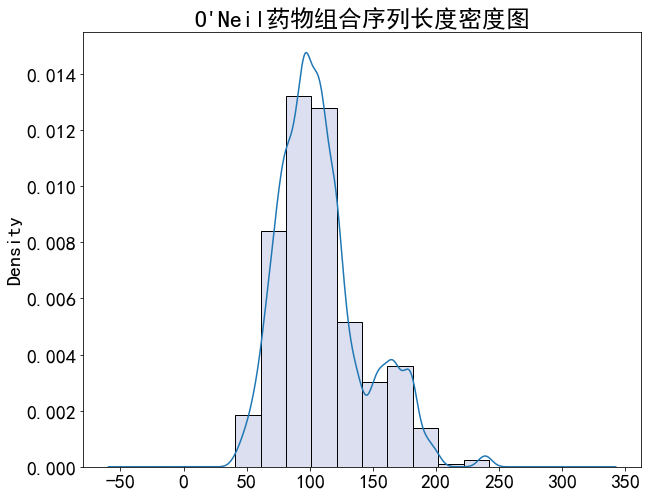

In [72]:
fig = plt.figure()

plt.rcParams['font.sans-serif']=['SimHei'] #用来指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False
#plt.subplot2grid((1, 2), (0, 0))
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 20})
plt.hist(synergy['seq_len'],bins=10,density=True,color='#DBDFEF',edgecolor ='black',label = '直方图')
synergy['seq_len'].plot(kind = 'kde',label = '密度图')
plt.title(u'O\'Neil药物组合序列长度密度图')

plt.show()

In [57]:
plt.rcParams.update({'font.size': 12})

Text(0.5, 1.0, 'NCI-ALMANAC药物组合序列长度密度图')

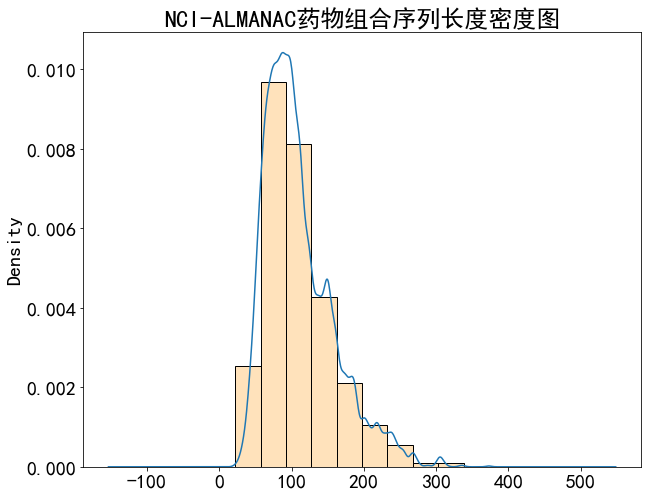

In [73]:
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 20})
plt.hist(ALMANAC['seq_len'],bins=10,density=True,color='#FFE2BB',edgecolor ='black',label = '直方图')
ALMANAC['seq_len'].plot(kind = 'kde',label = '密度图')
plt.title('NCI-ALMANAC药物组合序列长度密度图')

In [3]:
def get_class(x):
    if x >= 30:
        return 1
    else:
        return 0

In [4]:
synergy['class'] = synergy['synergy'].apply(get_class)

In [5]:
cell_tissue = pd.read_csv('H:/PaperProject/220412PaperWriting/SMILES_Transformer_DataProc/graph/tissue.csv')

In [6]:
synergy = synergy.merge(cell_tissue,left_on='cell_line',right_on='cell_line')

In [7]:
synergy.columns

Index(['Unnamed: 0', 'drug_a_name', 'drug_b_name', 'cell_line', 'synergy',
       'fold', 'drug_x', 'smiles_x', 'drug_y', 'smiles_y', 'seq', 'class',
       'tissue'],
      dtype='object')

In [8]:
synergy.to_csv('labels_smiles_seq_class_tissue.csv')

In [2]:
synergy = pd.read_csv('labels_smiles_seq_class_tissue.csv')

In [21]:
plt.rcParams.update({'font.size': 14})

In [34]:
t1 = ['SKIN','OVARY','LUNG']
t2 = ['LARGE_INTESTINE', 'BREAST', 'PROSTATE']

In [33]:
synergy['tissue'].unique()

array(['SKIN', 'OVARY', 'LUNG', 'LARGE_INTESTINE', 'BREAST', 'PROSTATE'],
      dtype=object)

e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


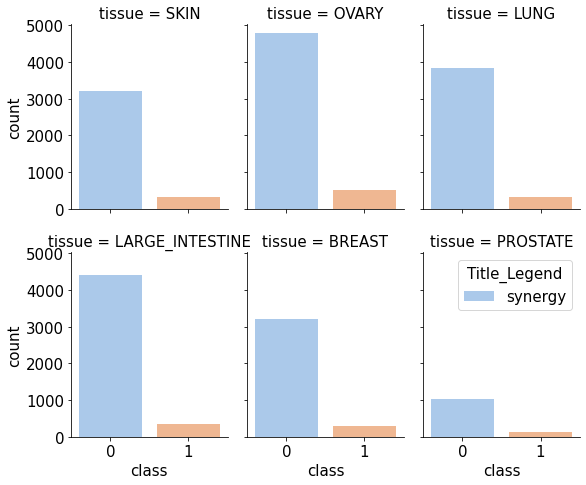

In [36]:
# -*- coding: utf-8 -*-
import seaborn as sns
plt.rcParams.update({'font.size': 15})
sns.catplot("class", col="tissue", col_wrap=3,
                data=synergy,
                kind="count", height=3.5, aspect=.8, 
                palette='pastel')



plt.legend(labels=["synergy"], title = "Title_Legend")
plt.show()

In [49]:
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False


e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


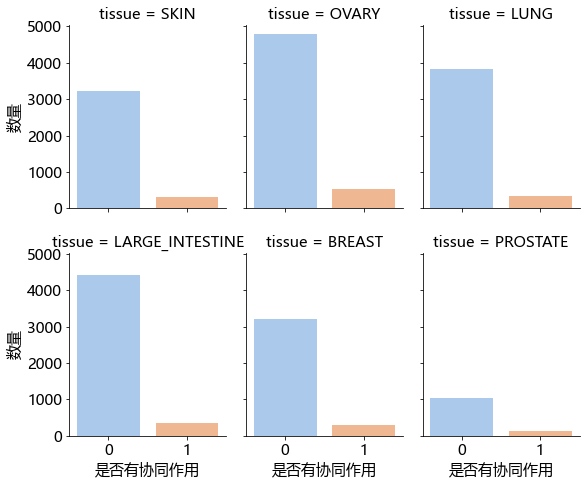

In [50]:
# -*- coding: utf-8 -*-

# 绘制图形并设置图例标签
g = sns.catplot("class", col="tissue", col_wrap=3, data=synergy, kind="count", height=3.5, aspect=.8, palette='pastel')
g.set_axis_labels("是否有协同作用", "数量")
#g.fig.legend(title='Legend', loc='right center')

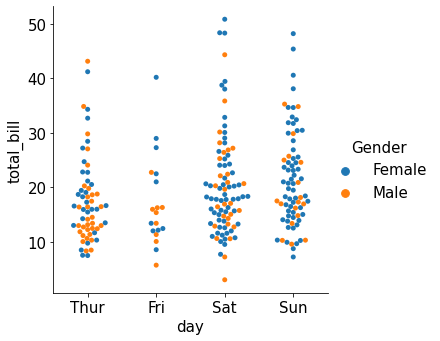

In [24]:
import seaborn as sns

tips = sns.load_dataset("tips")
g = sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

g.legend.set_title("Gender")
new_labels = ['Female', 'Male']
for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)

In [3]:
Prostate = 'PROSTATE'
large = 'LARGE_INTESTINE'
p_l = ['PROSTATE','LARGE_INTESTINE','LUNG']

In [21]:
data_pro = synergy.query('tissue == @Prostate')
data_large = synergy.query('tissue == @large')
data_pro_large = synergy.query('tissue in @p_l')

In [7]:
data_pro_large.reset_index(drop=True, inplace=True)

In [19]:
data_pro_large['num'] = data_pro_large.index
data_large['num'] = data_large.index
data_pro['num'] = data_pro.index

C:\Users\10131\AppData\Local\Temp\ipykernel_13600\2191800537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_large['num'] = data_large.index
C:\Users\10131\AppData\Local\Temp\ipykernel_13600\2191800537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pro['num'] = data_pro.index


In [10]:
data_pro_vcap = data_pro.query('cell_line == \'VCAP\'')
data_pro_LNCAP = data_pro.query('cell_line == \'LNCAP\'')

In [45]:
data_pro_large.index = data_pro_large.reset_index()

In [11]:
data_pro_large = pd.concat([data_pro,data_large])

In [12]:
data_pro_large.reset_index(drop=True, inplace=True)

In [ ]:
data_pro_large.reset_index(drop=True, inplace=True)

In [13]:
data_pro_large['num'] = data_pro_large.index

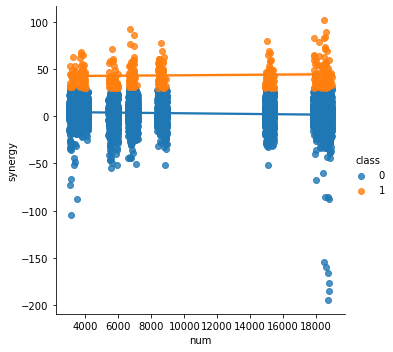

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example tips dataset

# Draw a scatterplot with a linear regression line
sns.lmplot(x="num", y="synergy",hue='class', data=data_large)

plt.show()

In [4]:
data = synergy.query('tissue in @p_l')

In [12]:
order = data.sort_values("tissue")['cell_line'].unique()

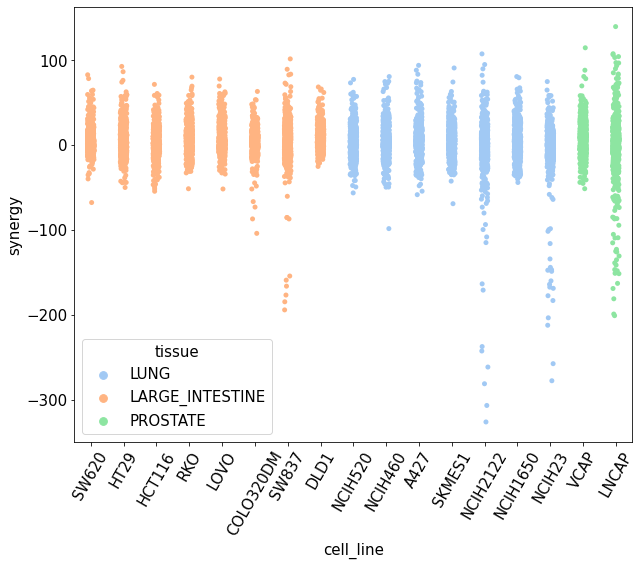

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
# Load the example tips dataset

# Draw a scatterplot with a linear regression line
plt.figure(figsize=(10, 8)) # 设置画布大小为10*8
sns.stripplot(x="cell_line", y="synergy",hue='tissue', data=data,palette='pastel',order=order)
plt.xticks(rotation=60)
plt.show()

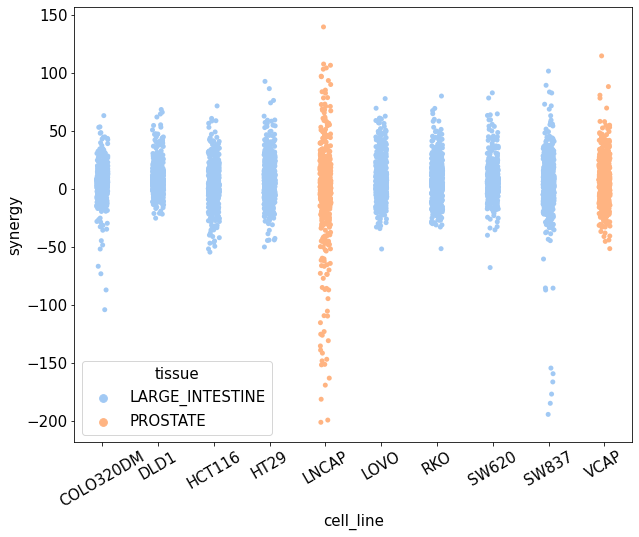

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
# Load the example tips dataset

# Draw a scatterplot with a linear regression line
plt.figure(figsize=(10, 8)) # 设置画布大小为10*8
sns.stripplot(x="cell_line", y="synergy",hue='tissue', data=data_pro_large,palette='pastel')
plt.xticks(rotation=30)
plt.show()

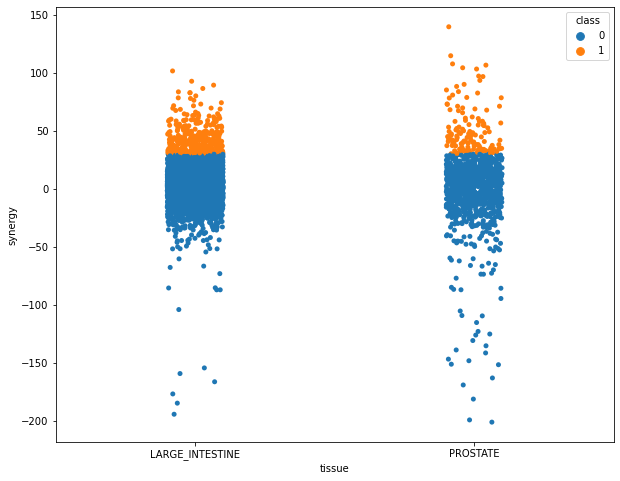

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example tips dataset

# Draw a scatterplot with a linear regression line
plt.figure(figsize=(10, 8)) # 设置画布大小为10*8
sns.stripplot(x="tissue", y="synergy",hue='class', data=data_pro_large)

plt.show()

e:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
e:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the marke

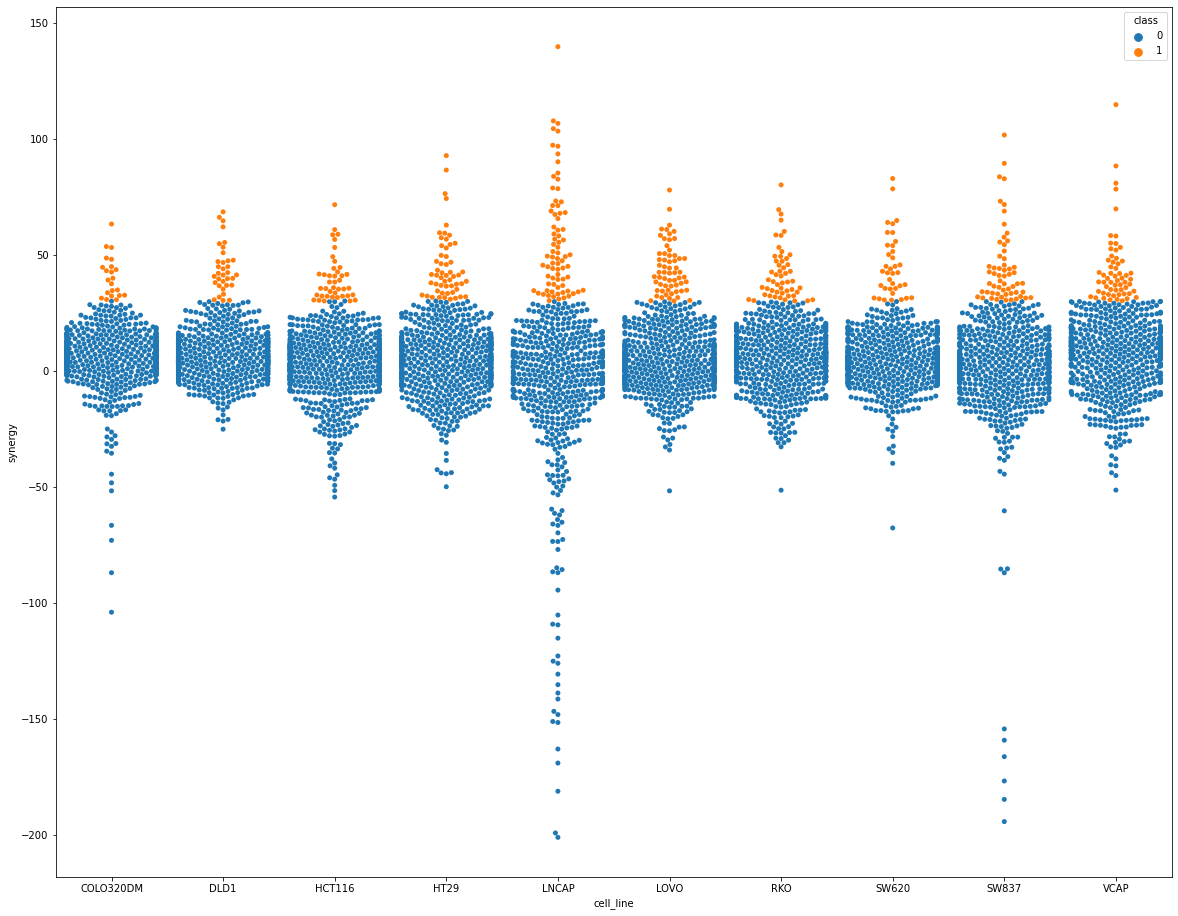

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example tips dataset
plt.figure(figsize=(20, 16))
# Draw a scatterplot with a linear regression line
sns.swarmplot(x="cell_line", y="synergy",hue='class', data=data_pro_large)

plt.show()

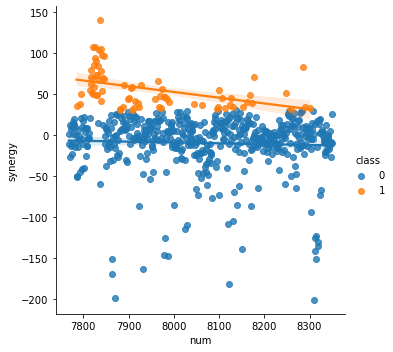

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example tips dataset

# Draw a scatterplot with a linear regression line
sns.lmplot(x="num", y="synergy",hue='class', data=data_pro_LNCAP)

plt.show()

In [29]:
data_large['num'] = data_large.index

C:\Users\10131\AppData\Local\Temp\ipykernel_12656\1063266151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_large['num'] = data_large.index


In [32]:
synergy.columns

Index(['Unnamed: 0', 'drug_a_name', 'drug_b_name', 'cell_line', 'synergy',
       'fold', 'drug_x', 'smiles_x', 'drug_y', 'smiles_y', 'seq', 'class',
       'tissue'],
      dtype='object')